# Investigating Movie Rating Biases: A Case Study of Fandango

In this study, we explore the presence of biases and potential dishonesty in online movie rating aggregators, with a specific focus on Fandango. Inspired by data journalist [Walt Hickey's in-depth analysis](https://fivethirtyeight.com/features/fandango-movies-ratings/) published in 2015, our aim is to scrutinize Fandango's rating data for any persistent patterns indicative of bias.

Hickey's investigation uncovered significant irregularities within Fandango's rating system, including:

* Consistent rounding up of ratings to the nearest half-star, without any instances of rounding down.
* An overwhelming prevalence of high ratings; nearly no movies received ratings below three stars (98% of the time), with 75% of ratings falling within the four-star range or higher.

**Why should we care?**

Understanding the integrity of online movie ratings is crucial for several reasons:

- The film industry is a **significant economic force**, generating billions annually at the U.S. box office. Consequently, the influence of online ratings aggregators on **consumer decisions** is substantial.
- Fandango, as a prominent player in the movie ticketing market, has a **vested interest** in shaping consumer perceptions through its ratings. Their influence extends to direct ticket sales.
- Regulatory bodies such as the **Federal Trade Commission** are vigilant in safeguarding consumers against deceptive and anti-competitive practices. Monitoring the online rating ecosystem for transparency and accountability is essential in ensuring **fair and transparent marketplace practices.**

Building upon Hickey's findings, our project seeks to assess whether Fandango has implemented measures to address these biases as previously indicated, or if the observed patterns continue to persist within their rating system. We aim to contribute to a more transparent and accountable rating ecosystem, empowering consumers and regulatory bodies to make informed decisions.

## Finding Suitable Datasets

We've chosen to utilize two distinct datasets for our investigation. This approach allows us to compare and analyze Fandango's ratings both before and after Walt Hickey's influential 2015 analysis:

1. **The 2015 Dataset**: We'll begin by examining the dataset originally collected by Walt Hickey as part of his comprehensive analysis. The dataset, [fandango_score_comparison.csv](https://github.com/fivethirtyeight/data/blob/master/fandango/fandango_score_comparison.csv), provides a snapshot of Fandango's rating practices before potential adjustments made in response to Hickey's findings.

2. **The 2016-2017 Dataset**: In addition to Hickey's dataset, we'll also incorporate a dataset spanning the years 2016 to 2017. This dataset, [movie_ratings_16_17.csv](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/movie_ratings_16_17.csv), provides a more recent perspective on Fandango's ratings landscape, allowing us to assess whether any changes or adjustments have occurred following Hickey's analysis.


### Load Essential Columns During Data Import
After reviewing the documentation for both the [2015](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) and [2016-2017](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) datasets, we've identified extraneous columns that won't contribute to our analysis. To streamline the dataset and ensure that only necessary information is loaded into memory, we'll retain the columns vital to our investigation.

In [1]:
# Config option to print all interactive output in a cell
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

# Columns to import from first dataset
columns = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']

# Import dataset prior to Hickey's analysis
movies_prior = pd.read_csv('./dataset/fandango_score_comparison.csv', usecols=columns)

movies_prior.head(3)
movies_prior.tail(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0
145,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0


In [3]:
# Columns to import for second dataset
columns = ['movie', 'year', 'fandango']

# Import dataset after Hickey's analysis
movies_after = pd.read_csv('./dataset/movie_ratings_16_17.csv', usecols=columns)

movies_after.head(3)
movies_after.tail(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


,movie,year,fandango
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5
213,Zootopia,2016,4.5


Now, we'll get a high-level overview of both datasets, providing a basic understanding of the structure and content of each dataset.

In [4]:
'---------- 2015 Dataset ----------->'
movies_prior.info()

'<-------- 2016-2017 Dataset ------->'
movies_after.info()

'---------- 2015 Dataset ----------->'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


'<-------- 2016-2017 Dataset ------->'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     214 non-null    object 
 1   year      214 non-null    int64  
 2   fandango  214 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


**Initial Observations:**

* The first dataset comprises 146 entries (movies) spread across 5 columns, while the second dataset consists of 214 entries (movies) and 3 columns.
* Both datasets exhibit completeness, with no missing values observed (non-null counts align with the total number of entries).
* Data types are consistent with the documentation and are optimal for our analysis needs.
* There is a disparity in the naming conventions of the column headers between the two datasets. Standardizing them would maintain consistency and clarity throughout the report.
* The first dataset has the year in paenthesis in the movie name. We'll want to clean this up by isolating the movie name and separating the year into a different column.

### Adjust Initial Goal to Minimize Sampling Error

**Methodology:**
1. **Data Collection:**
* fandango_score_comparison.csv: Contains data on every film with **at least 30 fan reviews** on Fandango, collected in **2015**.
* movie_ratings_16_17.csv: Consists of movie ratings data for **214 popular movies** released in **2016** and **2017**.

2. **Population of Interest:** Fandango's entire movie dataset.

3. **Sampling Approach:** Recognize that both datasets are not obtained through random sampling and may not be representative of the population of interest.

4. **Adjusted Analysis:** Instead of investigating changes in Fandango's rating system over time, we will compare Fandango's ratings for popular movies **(30 reviews and up)** in **2015** and **2016**. This approach allows us to explore potential differences in ratings between the two time periods.

5. **Adjusted Population of Interest:** All Fandango's ratings for popular movies released in 2015 and 2016.

Given the limitations of the available datasets and the non-random sampling processes involved, we have refined our project goal to focus on comparing Fandango's ratings for popular movies in 2015 and 2016. This adjustment allows us to leverage the available data effectively while minimizing the risk of drawing inaccurate conclusions due to sampling bias.

## Data Cleaning and Preparation

To prepare the data for analysis, we'll undertake the following steps:

1. **Standardize Column Names:** Clean up the column names to ensure consistency across both datasets.
2. **Assess Sample Representativeness:** Check if the samples contain a sufficient number of popular movies to accurately represent the population.
3. **Extract Release Year:** Extract the release year from the movie titles and store it in a separate column.
4. **Filter Data:** Isolate sample points corresponding to movies released in 2015 and 2016, as they are our population of interest.

### 1. Standardize Column Names

We'll standardize the column names to lowercase and match names for similar columns.

In [5]:
# Change first dataset's column header to lowercase
movies_prior.columns = movies_prior.columns.str.lower()

# Map the column headers to the desired names
movies_prior.rename(columns={'fandango_ratingvalue': 'fandango_rating_value', 'film': 'movie'}, inplace=True)

# Display updated column header
movies_prior.columns

Index(['movie', 'fandango_stars', 'fandango_rating_value', 'fandango_votes',
       'fandango_difference'],
      dtype='object')

### 2. Assess Sample Representativeness

We'll assess the representativeness of our sample by checking if the movies included have a rating of 30 or higher to match the defined expectation of *popular* movies. We'll begin with the first dataset.

In [6]:
# Check the number of movies with less than 30 fan reviews
movies_prior.loc[movies_prior['fandango_votes'] < 30, 'movie'].count()

0

In [7]:
# Get the min and max reviews in the first dataset
min_reviews = movies_prior['fandango_votes'].min()
max_reviews = movies_prior['fandango_votes'].max()

# Display the range
'Range: [{} - {}]'.format(min_reviews, max_reviews)

'Range: [35 - 34846]'

In the first dataset (prior to Hickey's analysis), none of the movies have fewer than 30 reviews; their review counts range from 35 to 34,846. This aligns with our definition of *popular* movies within our population of interest.

However, the documentation for the second dataset does not explicitly define the criteria for *popular* movies, which raises concerns about its representativeness. To address this issue, we can attempt to merge the two datasets and examine whether they share any common movies. This comparison could provide further insights into the popularity criteria used in the second dataset.

**Merge the datasets to compare fan reviews:**

In [8]:
# Merge the two dataset: Keep all movies from the second dataset and common movies from the first
merged_data = pd.merge(left=movies_after, right=movies_prior, how='inner', on='movie')

merged_data['fandango_votes'].value_counts(dropna=False)

Series([], Name: count, dtype: int64)

The absence of common movies between the two datasets presents a challenge. To overcome this, we'll explore alternative methods for assessing the representativeness of the second dataset. One approach is to take a sample from the second dataset and manually check the fan reviews on the website. This method should provide us with a reasonable estimation of the popularity criteria used in the second dataset.

**Generate sample movies to compare fan reviews:**

In [9]:
# Generate 10 samples from the second dataset
movies_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

<table cellspacing="0" cellpadding="5" style="background-color: #ffffff;">
  <tr>
    <th style="background-color: #cccccc;">Movie</th>
    <th style="background-color: #cccccc;">Fan Ratings</th>
  </tr>
  <tr>
    <td style="background-color: #f2f2f2;">Mechanic: Resurrection</td>
    <td style="background-color: #f2f2f2;">2,247</td>
  </tr>
  <tr>
    <td>Warcraft</td>
    <td>7,271</td>
  </tr>
  <tr>
    <td style="background-color: #f2f2f2;">Max Steel</td>
    <td style="background-color: #f2f2f2;">493</td>
  </tr>
  <tr>
    <td>Me Before You</td>
    <td>5,263</td>
  </tr>
  <tr>
    <td style="background-color: #f2f2f2;">Fantastic Beasts and Where to Find Them</td>
    <td style="background-color: #f2f2f2;">13,400</td>
  </tr>
  <tr>
    <td>Cell</td>
    <td>17</td>
  </tr>
  <tr>
    <td style="background-color: #f2f2f2;">Genius</td>
    <td style="background-color: #f2f2f2;">127</td>
  </tr>
  <tr>
    <td>Sully</td>
    <td>11,877</td>
  </tr>
  <tr>
    <td style="background-color: #f2f2f2;">A Hologram for the King</td>
    <td style="background-color: #f2f2f2;">500</td>
  </tr>
  <tr>
    <td>Captain America: Civil War</td>
    <td>35,057</td>
  </tr>
</table>


90% of the movies in our sample are popular, which provides a solid basis for moving forward with your analysis. It suggests that your dataset likely captures a representative portion of the population of interest. 

### 3. Extract Release Year

We now want to refine the movie column in the first dataset by isolating the movie title and extracting the release year from each `movie` column. This step will facilitate future analysis, allowing us to cross-reference the release years of movies to ensure the representativeness of our dataset.

In [10]:
# Define regex pattern for year
year_pattern = r"(?P<year>[1-2][0-9]{3})"

# Extract the year and store it in a column
movies_prior['year'] = movies_prior['movie'].str.extract(year_pattern)

# Extract movie to store in a column
movies_prior['movie'] = movies_prior['movie'].str.split('(').str[0]

movies_prior

,movie,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015
3,Do You Believe?,5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2,3.5,3.0,1021,0.5,2015
...,...,...,...,...,...,...
141,Mr. Holmes,4.0,4.0,1348,0.0,2015
142,'71,3.5,3.5,192,0.0,2015
143,"Two Days, One Night",3.5,3.5,118,0.0,2014
144,Gett: The Trial of Viviane Amsalem,3.5,3.5,59,0.0,2015


In [11]:
# First dataset frequency distribution
print('---------- First Dataset -------')
movies_prior['year'].value_counts()

# Second dataset frequency distribution
print('---------- Second Dataset -------')
movies_after['year'].value_counts()

---------- First Dataset -------


year
2015    129
2014     17
Name: count, dtype: int64

---------- Second Dataset -------


year
2016    191
2017     23
Name: count, dtype: int64

We've observed that certain movies fall outside the expected range of years within our defined population of interest. This divergence prompts us to investigate further and potentially exclude these outliers from our analysis.

### 3. Filter 2015 and 2016 Data

Now that the movie name and the year are in separate columns, we can determine the number of movies released outside of 2015 and 2016. We'll start by discarding the outliers and isolating the data for movies released in 2015 for the first dataset.

In [12]:
movies_2015 = movies_prior[movies_prior['year'] == '2015']

movies_2015['year'].value_counts()

year
2015    129
Name: count, dtype: int64

We'll repeat the process for the second dataset and isolate the data for movies released in 2016.

In [13]:
movies_2016 = movies_after[movies_after['year'] == 2016]

movies_2016['year'].value_counts()

year
2016    191
Name: count, dtype: int64

## A Comparison of 2015 and 2016 Movies
To compare the datasets, we'll be performing the following steps:
1. Analyze Fandango rating distributions using a Kernel Density Plot.
2. Examine relative frequency distributions for a detailed view.
3. Determine the direction of change using key statistics.
4. Visualize statistical insights with a grouped bar plot.

### Analyze Fandango Rating Distributions Using a Kernel Density Plot: 

To gain insight into potential changes in Fandango's rating distribution between 2015 and 2016, we'll begin with a high-level comparison of the two datasets using kernel density plots. Our goal is to visualize and compare the distribution shapes of movie ratings in each year.

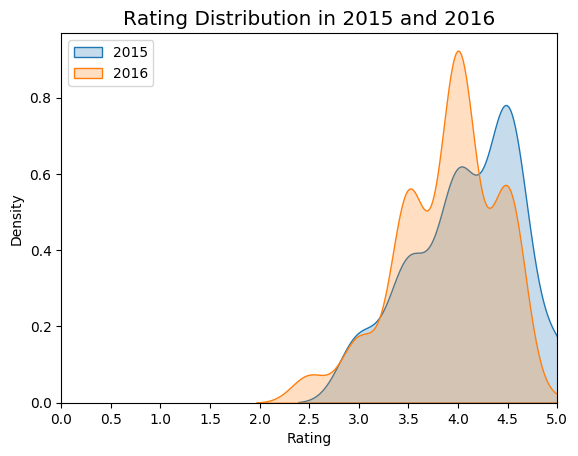

In [23]:
import seaborn as sns, matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('_classic_test_patch')
palette_colors = sns.color_palette('RdYlBu')

# Plot kernel distribution estimate plots for 2015 and 2016 data
sns.kdeplot(data=movies_2015, x='fandango_stars', label='2015', fill=True)
sns.kdeplot(data=movies_2016, x='fandango', label='2016', fill=True)

#movies_2015['fandango_stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
#movies_2016['fandango'].plot.kde(label = '2016', legend = True)

# Customize the visualization
plt.title('Rating Distribution in 2015 and 2016', size='x-large')
plt.xlabel('Rating')
plt.xlim(0, 5)
plt.xticks(arange(0.0, 5.1, .5))
plt.legend()

plt.show();

**Observations:**

* Both distributions display a heavy left skew, suggesting a prevalence of higher ratings.
* The distribution for 2016 appears closer to a normal distribution with a mean around 4.0, whereas the 2015 distribution is slightly more left-skewed.
* A noticeable shift to the left is evident in the 2016 distribution compared to 2015. This indicates a directional difference: ratings in 2016 were marginally lower than in 2015.

Now, we'll take a granular look at the statistics for both dataset.

In [15]:
movies_2015['fandango_stars'].describe()

count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: fandango_stars, dtype: float64

In [16]:
movies_2016['fandango'].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

* The 2016 dataset exhibits slightly more variability in ratings between 2.5 and 5.0 compared to 2015, where ratings primarily range from 3.0 to 5.0.
* Around 25% of the time, movies in 2016 receive ratings between 4.0 and 4.25, whereas in 2015, this range is between 4.0 and 4.5. This suggests a lower rating distribution in 2016.


### Examine Relative Frequency Distributions for a Detailed View

Given the different number of movies in each sample, employing relative frequency rather than absolute values is more appropriate for comparing their distributions. To begin, let's normalize the data by examining the relative frequency distribution of 2016 movies.

In [17]:
# Normalize 2016 data
movies_2016['fandango'].value_counts(normalize=True) * 100

fandango
4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: proportion, dtype: float64

In contrast to Hickey's analysis, which showed almost no ratings less than 3.0, the 2016 dataset reflects a slight improvement, with a 3.14% increase in 2.5 ratings. However, the vast majority, roughly 66%, still receive ratings of 4.0 or above. 

Next, we'll visually compare the relative frequency distribution of 2015 and 2016 movie ratings by plotting a pie chart within the same grid.

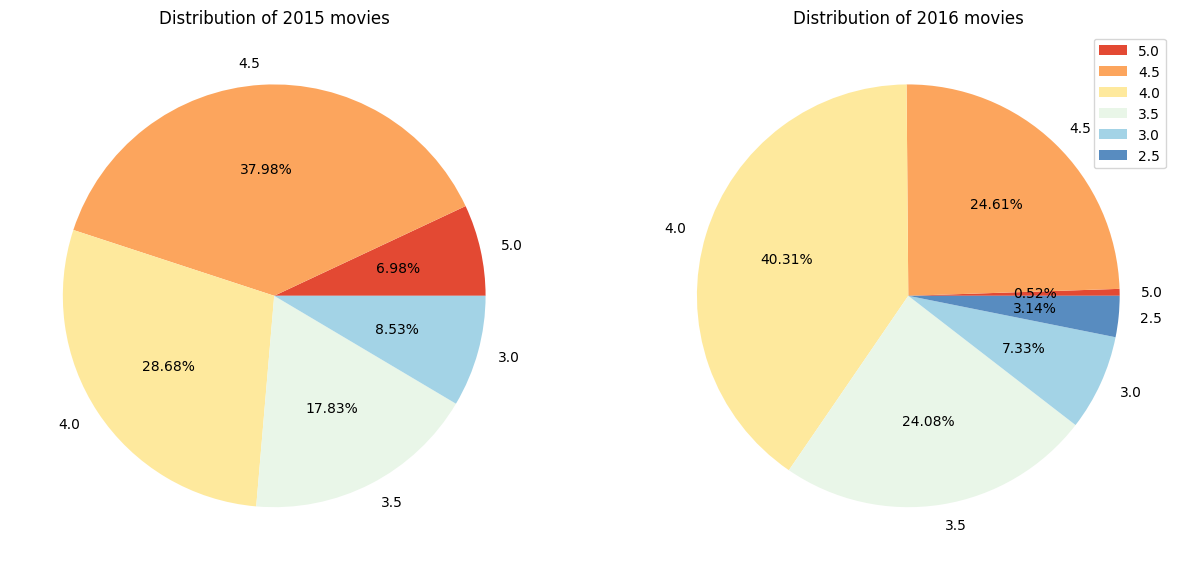

In [18]:
plt.figure(figsize=(15, 7))

# Plot the 2015 movie rating in a pie chart
plt.subplot(1, 2, 1)
movies_2015['fandango_stars'].value_counts().sort_index(ascending=False).plot.pie(subplots=True, autopct='%.2f%%', colors=palette_colors)

# Customize visualization
plt.title('Distribution of 2015 movies')
plt.ylabel('')

# Plot the 2016 movie rating in a pie chart
plt.subplot(1, 2, 2)
movies_2016['fandango'].value_counts().sort_index(ascending=False).plot.pie(subplots=True, autopct='%.2f%%', colors=palette_colors)

# Customize visualization
plt.title('Distribution of 2016 movies')
plt.ylabel('')

plt.legend(loc='upper right')
plt.show();

**Observations:**
* In 2016, less than 1% of movies receive a 5.0-star rating, compared to almost 7% in 2015, indicating a significant decrease in higher ratings.
* A significant portion (44.96%) of ratings in 2015 are above 4.5 stars. In contrast, the majority (89%) of ratings in 2016 are distributed at 4.0, 4.5, and 3.5 stars.
* Despite slight differences, the proportion of ratings at or below 3.0 stars is not significantly higher in 2016 (10.47%) compared to 2015 (8.53%), with a marginal difference of 1.94%.

### Determine the Direction of Change Using Key Statistics

While the pie chart provided detailed distribution information, it may not offer as clear a visual indication of the direction of change as the kernel density plot. Let's compare summary statistics, including mean, median, and mode, to gain further insight into the direction of the change between 2015 and 2016.

In [19]:
# Create an empty dataframe for the mean, median, and mode of 2015 and 2016 ratings
stats = pd.DataFrame([],
                  index=('2015', '2016'),
                  columns=('mean', 'median', 'mode'))

# Function to display the summary statistics for a series
def generate_stats(data, year):
    print(year + '\n----------------')

    # Calculate the mean, median, and mode of given data
    data_mean = round(data.mean(), 1)
    data_median = round(data.median(), 1)
    data_mode = data.mode()[0]

    # Add values to the dataframe
    stats.loc[year, ['mean', 'median', 'mode']] = [data_mean, data_median, data_mode]

    print('Mean: {} \nMedian: {} \nMode {}\n'.format(data_mean, data_median, data_mode))

stats


,mean,median,mode
2015,NaN,NaN,NaN
2016,NaN,NaN,NaN


In [20]:
# Mean, median, mode of 2015 ratings
generate_stats(movies_2015['fandango_stars'], '2015')

# Mean, median, mode of 2016 ratings
generate_stats(movies_2016['fandango'], '2016')

2015
----------------
Mean: 4.1 
Median: 4.0 
Mode 4.5

2016
----------------
Mean: 3.9 
Median: 4.0 
Mode 4.0



**Observations:**
The 50th percentile is 4.0, indicating that 50% of the ratings are less than or equal to this value for both years.
The most frequent rating is 4.5 in 2015, while it's half a rating lower in 2016.
In 2015, the mean rating of 4.1 indicates that higher ratings are pulling the mean towards the right. Conversely, in 2016, the mean rating is slightly lower at 3.9, suggesting a shift towards the left in the ratings distribution.

Overall, there is a noticeable shift to the left in the ratings distribution from 2015 to 2016.

### 4. Visualize Statistical Insights with a Grouped Bar Plot

In [21]:
# Display the contents of the stats dataframe
stats

,mean,median,mode
2015,4.1,4.0,4.5
2016,3.9,4.0,4.0


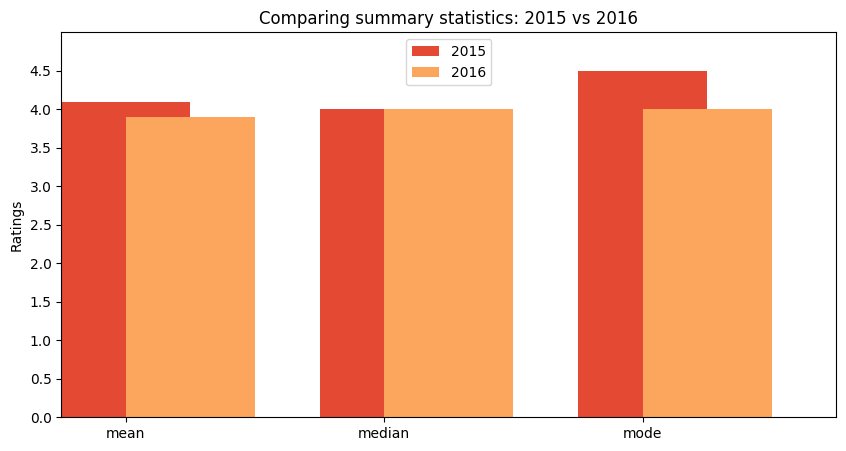

In [22]:
# Grouped bar plot to compare stats between 2015 and 2016 ratings
plt.figure(figsize=(10, 5))

# Plot 2015 statistical summary
stats.loc['2015'].plot.bar(color=palette_colors[0], align='center', label='2015')

# Plot 2015 statistical summary
stats.loc['2016'].plot.bar(color=palette_colors[1], align='edge', label='2016', rot=0)

plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylim(0, 5)
plt.ylabel('Ratings')
plt.yticks(arange(0, 5.0, .5))
plt.legend(loc='upper center')
plt.show();

## Conclusion

A subtle difference appears in Fandango's rating system between 2016 and 2015. On average, movies in 2016 received slightly lower ratings compared to 2015, with ratings as low as 2.5 in 2016 compared to a minimum of 3.0 in 2015. Notably, the proportion of movies rated above 4.5 decreased noticeably in 2016 compared to 2015, indicating a significant change in the distribution of ratings.

Overall, while the analysis does not reveal a significant alteration in Fandango's rating system, it suggests that corrections may have been implemented following Hickey's analysis.